##**Part 1**##

Installing Python (3.9+) and necessary requirements 

* Python version should be 3.9 +

In [25]:
!python --version

/bin/bash: line 1: python: command not found


Loading the model and test dataset

Copy `career-model/requirements.txt` and `career-model/model.pkl` from the [draft pull request example](https://github.com/CMU-313/NodeBB/pull/186/files) 

* Download all requirements necessary

In [26]:
! pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


* Define fields for a sample student application input for a sample run on the prediction function

In [27]:
student = {
        "Student ID": "student1",
        "Gender": "M",
        "Age": "20",
        "Major": "Computer Science",
        "GPA": "4.0",
        "Extra Curricular": "Men's Basketball",
        "Num Programming Languages": "1",
        "Num Past Internships": "2"
    }

* Run a sample input on the predict function


> This function should return `{'good_employee': 1}`


In [28]:
from predict import predict # This is to import the predict function from predict.py

In [29]:
predict(student)

{'good_employee': 1}

# **Part 2**
Plotting the distribution of the test dataset across all features (except Student ID)

* Import necessary Python libraries

In [30]:
! pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* Create the global variable for the dataset from the csv file

In [32]:
dataset = pd.read_csv('student_data.csv')

* Print s sample of the table for reference on the data fields of the dataset

In [33]:
dataset.head()

,Student ID,Gender,Age,Major,GPA,Extra Curricular,Num Programming Languages,Num Past Internships,Good Candidate
0,0,F,21,Statistics and Machine Learning,2.83,Sorority,4,1,0
1,1,M,20,Information Systems,2.89,Fraternity,5,3,0
2,2,F,20,Math,2.66,Teaching Assistant,3,1,0
3,3,M,20,Information Systems,2.48,Fraternity,5,0,0
4,4,F,21,Statistics and Machine Learning,3.30,Sorority,2,1,0


* Generate plot for Gender


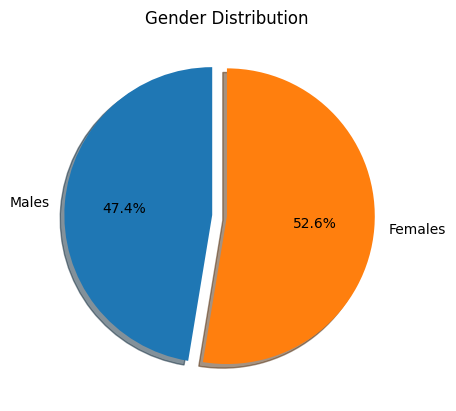

In [34]:
import matplotlib.pyplot as plt # Re-import for plotting to render

dataset_gender_list = list(dataset['Gender'])
males_count = dataset_gender_list.count('M')
females_count = dataset_gender_list.count('F')
labels = 'Males', 'Females'
slices = [males_count, females_count]
fig, ax = plt.subplots()
explode = (0.1,0)
ax.set_title("Gender Distribution")
ax.pie(slices, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

* Generate plot for Age

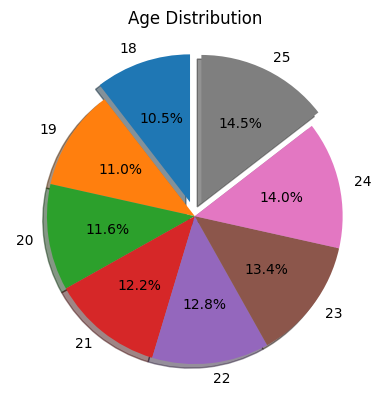

In [35]:
dataset_age_list = list(dataset['Age'])
slices = list(set(dataset_age_list))
labels = [str(slices[i]) for i in range(len(slices))]
fig, ax = plt.subplots()
explode = (0.1,0,0,0,0,0,0,0.101)
ax.set_title("Age Distribution")
ax.pie(slices, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

* Generate a plot for Major

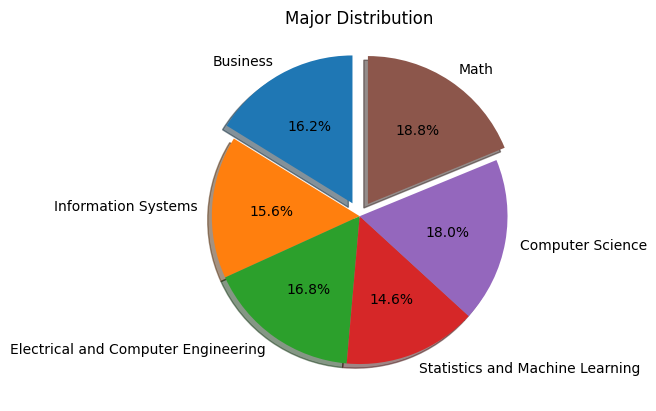

In [36]:
dataset_majors_list = list(dataset['Major'])
labels = list(set(dataset_majors_list))
slices = [dataset_majors_list.count(labels[i]) for i in range(len(labels))]
fig, ax = plt.subplots()
explode = (0.1,0,0,0,0,0.1001)
ax.set_title("Major Distribution")
ax.pie(slices, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

* Generate a plot for GPA

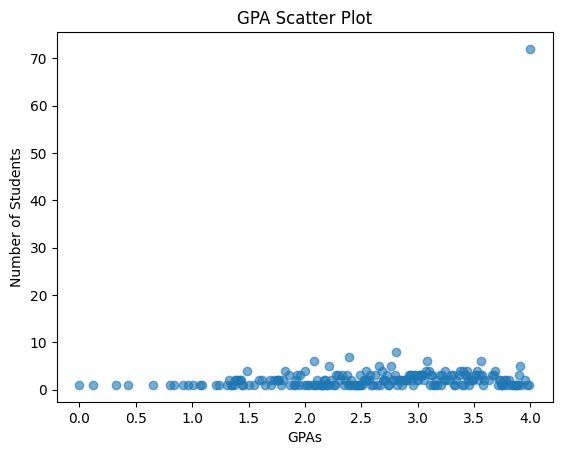

In [37]:
dataset_gpas_list = sorted(list(dataset['GPA']))

dataset_gpas_set = sorted(list(set(dataset['GPA'])))
dataset_gpa_students = [dataset_gpas_list.count(dataset_gpas_set[i]) for i in range(len(dataset_gpas_set))]

fig, ax = plt.subplots()
colors = np.random.rand(1502)
ax.scatter(dataset_gpas_set,dataset_gpa_students, alpha=0.6)
ax.set_title('GPA Scatter Plot')
ax.set_xlabel('GPAs')
ax.set_ylabel('Number of Students')
plt.show()

* Generate a plot for extracirriculars

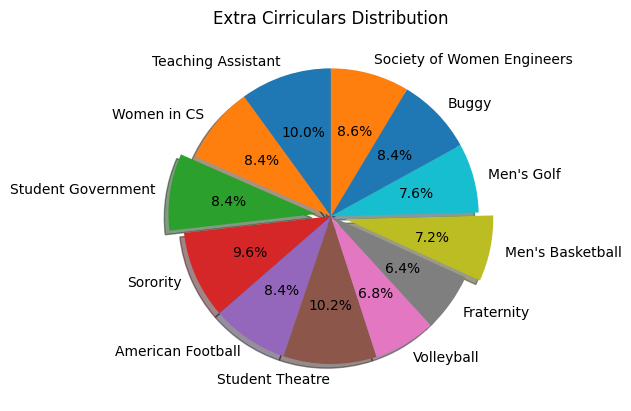

In [38]:
dataset_ec_list = list(dataset['Extra Curricular'])
labels = list(set(dataset_ec_list))
slices = [dataset_ec_list.count(labels[i]) for i in range(len(labels))]
fig, ax = plt.subplots()
explode = (0,0,0.1,0,0,0,0,0,0.1,0,0,0)
ax.set_title("Extra Cirriculars Distribution")
ax.pie(slices, explode = explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

* Generate a plot for Num Programming Languages

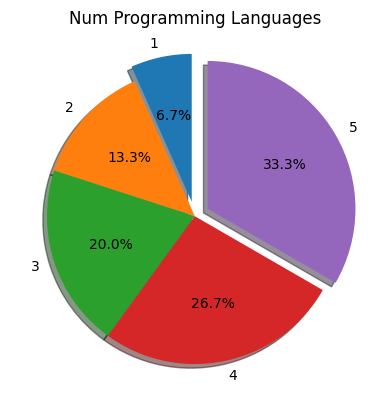

In [39]:
dataset_npl_list = list(dataset['Num Programming Languages'])
slices = list(set(dataset_npl_list))
labels = [str(slices[i]) for i in range(len(slices))]
fig, ax = plt.subplots()
explode = (0.1,0,0,0,0.1)
ax.set_title("Num Programming Languages")
ax.pie(slices, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

* Generate a plot for Num Past Internships

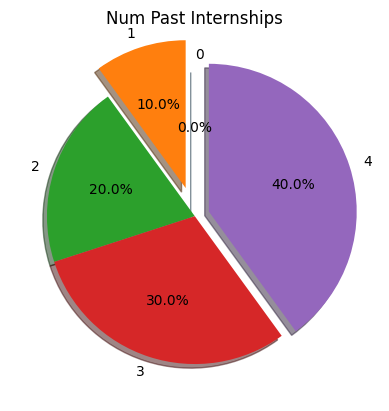

In [40]:
dataset_npl_list = list(dataset['Num Past Internships'])
slices = list(set(dataset_npl_list))
labels = [str(slices[i]) for i in range(len(slices))]
fig, ax = plt.subplots()
explode = (0,0.2,0,0,0.1)
ax.set_title("Num Past Internships")
ax.pie(slices, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

* Generate a plot for Good/Not Good Candidates

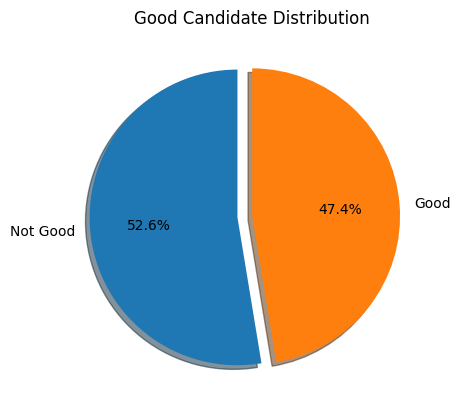

In [41]:
dataset_candidate_list = list(dataset['Good Candidate'])
bad_count = dataset_candidate_list.count(0)
good_count = dataset_candidate_list.count(1)
labels = 'Not Good', 'Good'
slices = [bad_count, good_count]
fig, ax = plt.subplots()
explode = (0.1,0)
ax.set_title("Good Candidate Distribution")
ax.pie(slices, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

# **Part 3** #
Predict the output of the test dataset using the model

Create a student object from each entry in the data csv file and run on the model. (This will take a while to run)

In [42]:
import pandas as pd

csvData = pd.read_csv('student_data.csv')

test = []
res = []

for i in range(0, 500):
  student = {
        "Student ID": str(csvData.loc[i][0]),
        "Gender": str(csvData.loc[i][1]),
        "Age": str(csvData.loc[i][2]),
        "Major": str(csvData.loc[i][3]),
        "GPA": str(csvData.loc[i][4]),
        "Extra Curricular": str(csvData.loc[i][5]),
        "Num Programming Languages": str(csvData.loc[i][6]),
        "Num Past Internships": str(csvData.loc[i][7])
  }
  
  res.append(csvData.loc[i][8])
  p = predict(student)
  test.append(p['good_employee'])


# **Part 4** #

Report the accuracy of the model, and the confusion matrix

Construct a confusion matrix from the results of running the model on all entries.

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test, res)

array([[221,  42],
       [ 42, 195]])

Generate the accuracy score.

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(test, res)

0.832